In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv(r'charts.csv')

In [2]:
df.head()

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26173514 entries, 0 to 26173513
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   title    object 
 1   rank     int64  
 2   date     object 
 3   artist   object 
 4   url      object 
 5   region   object 
 6   chart    object 
 7   trend    object 
 8   streams  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.8+ GB


In [4]:
df[['artist','title','date']].nunique()

artist     96156
title     164806
date        1826
dtype: int64

In [5]:
first_rank_song = df[df['rank']==1]['artist'].value_counts().head(10)
first_rank_artist =df[df['rank']==1]['title'].value_counts().head(10)

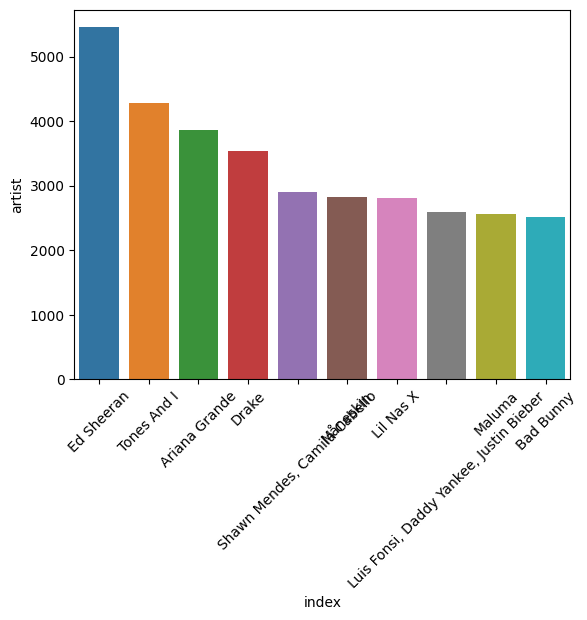

In [6]:
import seaborn as sns
sns.barplot(data=first_rank_song.reset_index(), x='index', y='artist')
plt.xticks(rotation=45)
plt.show()

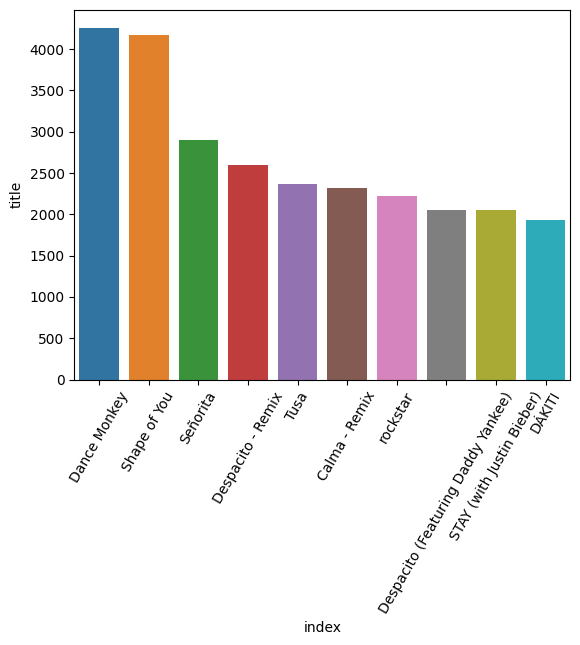

In [7]:
sns.barplot(data=first_rank_artist.reset_index(), x='index', y='title')
plt.xticks(rotation=60)
plt.show()

# creating total streams

In [8]:
total_song_streams=df.groupby('title').agg({'streams':['sum','mean']}).reset_index()

In [9]:
total_song_streams.columns = total_song_streams.columns.droplevel(0)
total_song_streams.rename({'':'song'},axis=1,inplace=True)

In [10]:
total_song_streams = total_song_streams[total_song_streams['sum']!=0]

In [11]:
total_song_streams.sort_values('sum',ascending=False)

,song,sum,mean
113016,Shape of You,5.245740e+09,80379.701066
16446,Blinding Lights,5.183476e+09,108561.298322
28232,Dance Monkey,4.553471e+09,104993.680025
116870,Someone You Loved,4.000278e+09,78475.285513
120441,Sunflower - Spider-Man: Into the Spider-Verse,3.786211e+09,95502.859327
...,...,...,...
32094,Divata,1.002000e+03,1002.000000
155810,ใครอีกคน,1.002000e+03,1002.000000
69077,La Guitarra - MTV Unplugged,1.001000e+03,1001.000000
116197,"So Xclusive (feat. K-Slicc, Lo$Ta & Badazz Luck)",1.001000e+03,1001.000000


In [12]:
total_artist_streams = df.groupby('artist').agg({'streams':['sum','mean']}).reset_index()

In [13]:
total_artist_streams.columns = total_artist_streams.columns.droplevel(0)
total_artist_streams.rename({'':'artist'},axis=1,inplace=True)

In [14]:
total_artist_streams = total_artist_streams[total_artist_streams['sum']!=0]
top_artist = total_artist_streams.sort_values('sum',ascending=False).head(15)

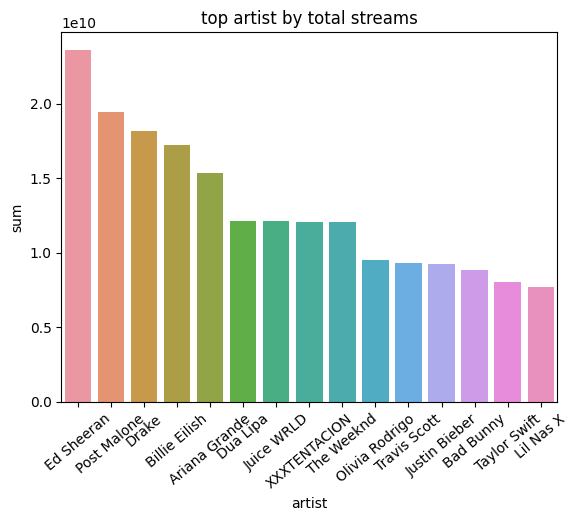

In [15]:
sns.barplot(data=top_artist, x="artist", y="sum")
plt.xticks(rotation=40)
plt.title('top artist by total streams')
plt.show()

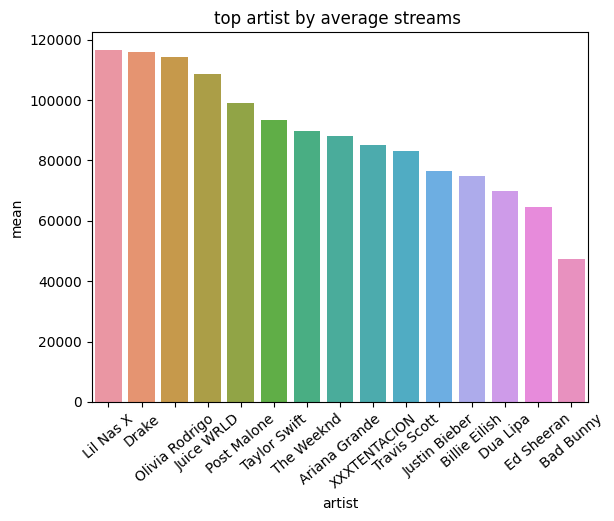

In [16]:
sns.barplot(data=top_artist.sort_values('mean',ascending=False), x="artist", y="mean")
plt.xticks(rotation=40)
plt.title('top artist by average streams ')
plt.show()

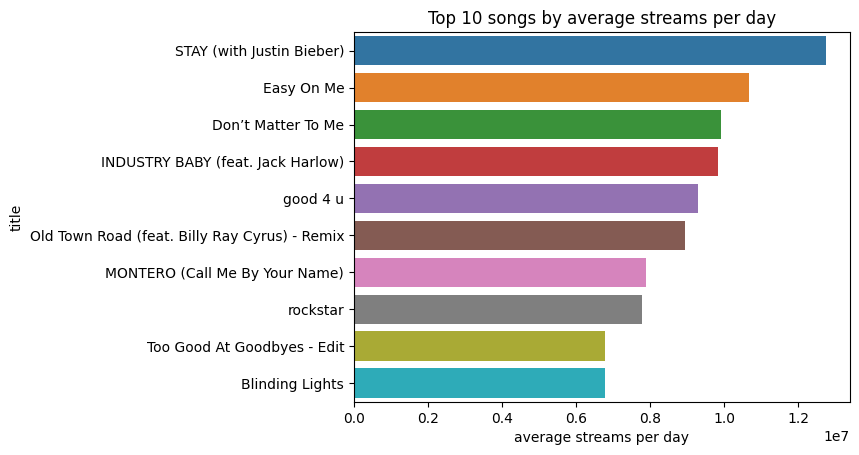

In [17]:
avg_stream_day_title = df.groupby(['title','date'],as_index=False).agg({'streams':'sum'}) \
    .groupby('title',as_index=False).agg({'streams':'mean'})
sns.barplot(data=avg_stream_day_title.sort_values('streams',ascending=False)[:10],y='title',x='streams')
plt.title('Top 10 songs by average streams per day')
plt.xlabel('average streams per day')
plt.show()

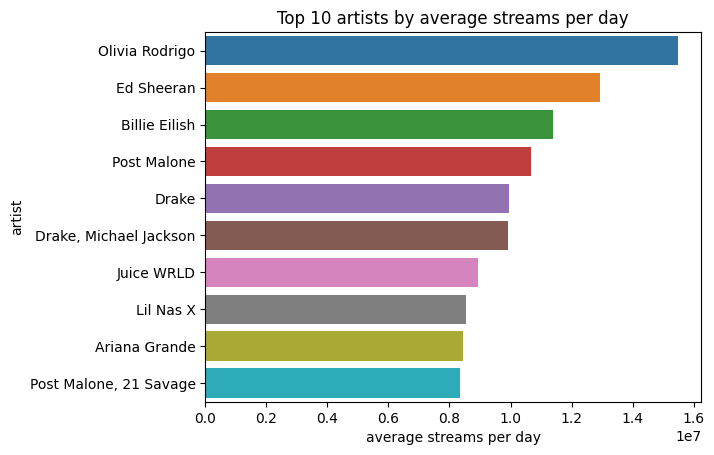

In [18]:
avg_stream_day_artist = df.groupby(['artist','date'],as_index=False).agg({'streams':'sum'}) \
    .groupby('artist',as_index=False).agg({'streams':'mean'})
sns.barplot(data=avg_stream_day_artist.sort_values('streams',ascending=False)[:10],y='artist',x='streams')
plt.title('Top 10 artists by average streams per day')
plt.xlabel('average streams per day')
plt.show()

In [19]:
df.head()

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0


# creating functions

In [20]:
df['month-year'] = df['date'].apply(lambda x:x[:7])

In [21]:
artist_streams_date = df.groupby(['artist','month-year']).agg({'streams':'sum'}).reset_index() \
    .query("streams!=0")

In [22]:
artist_streams_date

,artist,month-year,streams
28,#LikeMe Cast,2020-01,24617.0
29,#LikeMe Cast,2020-02,150377.0
30,#LikeMe Cast,2020-03,57530.0
31,#LikeMe Cast,2020-04,28806.0
32,#LikeMe Cast,2020-05,17986.0
...,...,...,...
372707,龔詩嘉,2019-09,5142.0
372708,龔詩嘉,2020-08,6902.0
372709,龔詩嘉,2021-08,9506.0
372724,이아람,2021-10,12951.0


In [23]:
top_artist_date_streams = artist_streams_date[artist_streams_date['artist'].isin(top_artist['artist'][:5])]

C:\Users\abuzu\AppData\Local\Temp\ipykernel_11948\4202689211.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  top_artist_date_streams = artist_streams_date[artist_streams_date['artist'].isin(top_artist['artist'][:5])]


In [24]:
artist_streams = df.groupby(['artist','date']).agg({'streams':'sum'}).reset_index() \
    .query("streams!=0")

In [25]:
def artist_streams_month(name):
    plt.figure(figsize=(20,7))
    artist = artist_streams_date[artist_streams_date['artist'].isin(name)]
    sns.lineplot(data=artist,x='month-year',y='streams',hue=artist['artist'],lw=3)
    plt.title(f"total streams by month of {name}",fontsize=20)
    plt.xticks(rotation=40)
    plt.grid()
    plt.show()
    

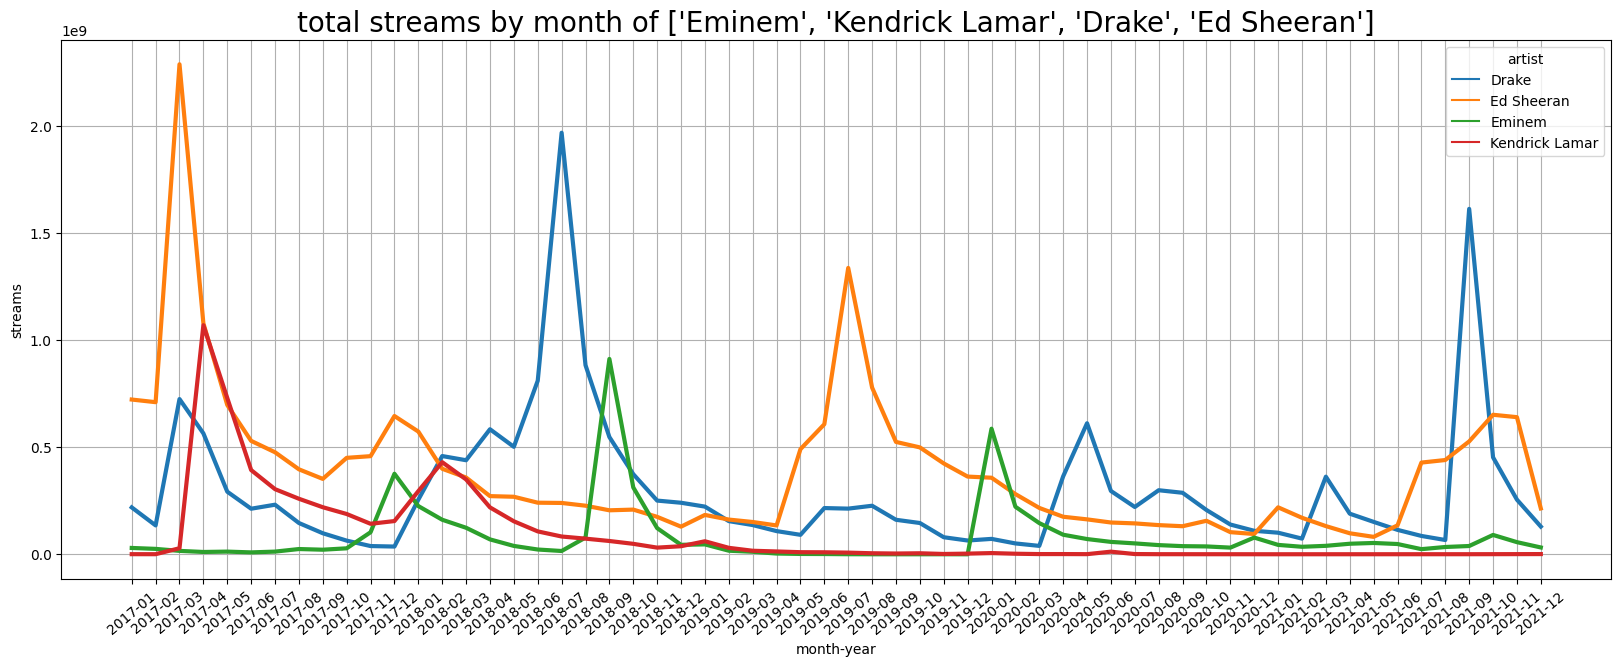

In [39]:
artist_streams_month(['Eminem','Kendrick Lamar','Drake','Ed Sheeran'])

In [27]:
def top_10_songs(name):
    artist = df[df['artist']==name]
    top_songs = artist.groupby('title').agg({'streams':'sum'}).reset_index().sort_values('streams',ascending=False)[:10]
    sns.barplot(data=top_songs,x='streams',y='title')
    plt.title(f'top 10 songs of {name}',fontsize=20)
    plt.show()

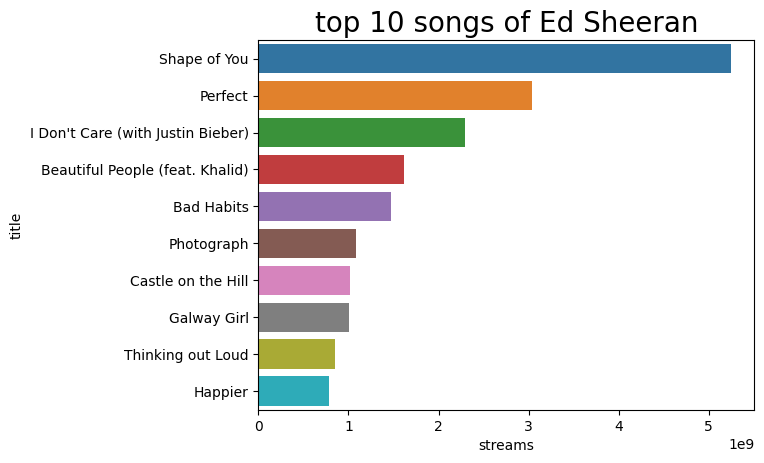

In [40]:
top_10_songs('Ed Sheeran')

In [29]:
df.head()

,title,rank,date,artist,url,region,chart,trend,streams,month-year
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0,2017-01
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0,2017-01
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0,2017-01
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0,2017-01
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0,2017-01


In [30]:
def artist_top_country_listening(name):
    top = df[df['artist']==name].groupby(['region'],as_index=False).agg({'streams':'sum'}).sort_values('streams',ascending=False)[:10]
    sns.barplot(data=top,x='streams',y='region')
    plt.show()

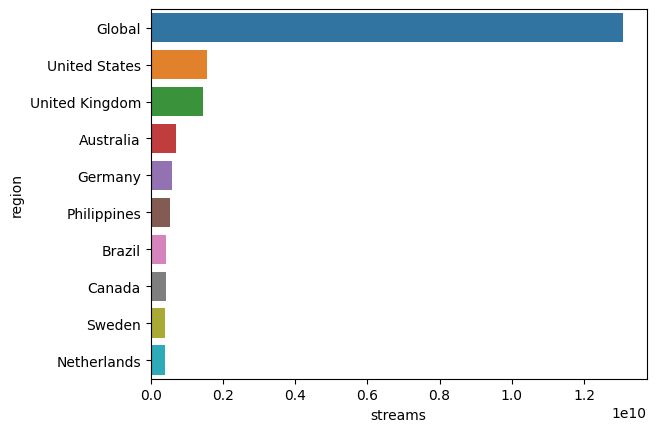

In [41]:
artist_top_country_listening('Ed Sheeran')

In [32]:
def song_streams_month(month_name):
    song_month = df[df['month-year']==month_name].groupby('title',as_index=False).agg({'streams':['sum','mean']})
    song_month.columns = song_month.columns.droplevel(0)
    song_month.rename({'':'title'},axis=1,inplace=True)
    song_month_sum = song_month.sort_values('sum',ascending=False)[:10]
    song_month_mean = song_month.sort_values('mean',ascending=False)[:10]
    
    
    print(song_month_mean[['title','mean']])
    plt.title(f'top 10 artists by average stream of {month_name}')
    sns.barplot(data=song_month_mean,x='mean',y='title')
    plt.show()
    print(song_month_sum[['title','sum']])
    plt.title(f'top 10 artists by total sum of streams of {month_name}')
    sns.barplot(data=song_month_sum,x='sum',y='title')
    plt.show()

In [33]:
def song_rank_count_month(month_name,rank):
    print(df[(df['rank']==rank)&(df['month-year']==month_name)]['title'].value_counts()[:10].reset_index())
    sns.barplot(data=df[(df['rank']==rank)&(df['month-year']==month_name)]['title'].value_counts()[:10].reset_index(),x='title',y='index')
    plt.title(f"rank: {rank}  month: {month_name}")
    plt.ylabel('songs')
    plt.xlabel('count')
    plt.show()

In [34]:
def artist_month_stat(month_name):
    month_artist = df[df['month-year']==month_name].groupby('artist',as_index=False).agg({'streams':['sum','mean']})
    month_artist.columns = month_artist.columns.droplevel(0)
    month_artist.rename({'':'artist'},axis=1,inplace=True)
    month_artist_sum = month_artist.sort_values('sum',ascending=False)[:10]
    month_artist_mean = month_artist.sort_values('mean',ascending=False)[:10]
    print(month_artist_mean[['artist','mean']])
    plt.title(f'top 10 artists by average stream of {month_name}')
    sns.barplot(data=month_artist_mean,x='mean',y='artist')
    plt.show()
    print('='*127*2)
    print(month_artist_sum[['artist','sum']])
    plt.title(f'top 10 artists by total sum of streams of {month_name}')
    sns.barplot(data=month_artist_sum,x='sum',y='artist')
    plt.show()

In [35]:
def artist_mean_distplot(artist_name):
    artist_streams_mean = df[df['artist']==artist_name].groupby('date',as_index=False).agg({'streams':'mean'})
    sns.distplot(a=artist_streams_mean['streams'],bins=50,hist_kws=dict(edgecolor="black"))
    plt.show()

C:\Users\abuzu\AppData\Local\Temp\ipykernel_11948\3945995650.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=artist_streams_mean['streams'],bins=50,hist_kws=dict(edgecolor="black"))


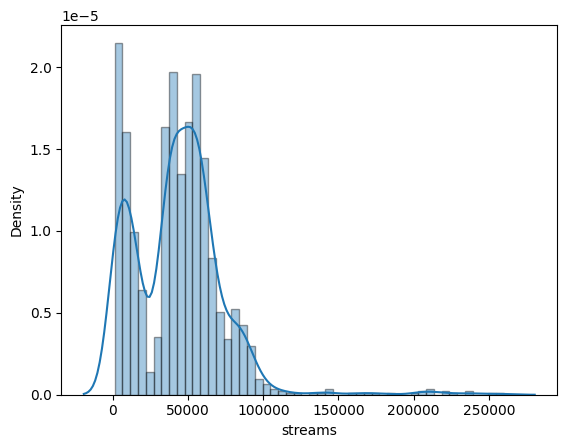

In [36]:
artist_mean_distplot('Eminem')

In [37]:
def top_song_by_country_month(country,month_name):
    stata_song = df[(df['region']==country) & (df['month-year']==month_name)].groupby('title',as_index=False) \
        .agg({'streams':'sum'}).sort_values('streams',ascending=False)[:10]
    print(stata_song)
    sns.barplot(data=stata_song,x='streams',y='title')
    plt.title(f'top 10 songs by total streams in {month_name}')
    plt.show()
    stata_artist = df[(df['region']==country) & (df['month-year']==month_name)].groupby('artist',as_index=False) \
        .agg({'streams':'sum'}).sort_values('streams',ascending=False)[:10]
    print(stata_artist)
    sns.barplot(data=stata_artist,x='streams',y='artist')
    plt.title(f'top 10 artists by total streams in {month_name}')
    plt.show()

                                                 title     streams
135                                  Despacito - Remix  20039367.0
590                                      Unforgettable  13403273.0
521                                    Strip That Down  11876370.0
347                                               Mama  11875991.0
276  I'm the One (feat. Justin Bieber, Quavo, Chanc...  11509111.0
27                                           Attention   9630844.0
565                    There's Nothing Holdin' Me Back   9345499.0
428             Pretty Girl - Cheat Codes X CADE Remix   9155320.0
538                      Symphony (feat. Zara Larsson)   8574296.0
628      Wild Thoughts (feat. Rihanna & Bryson Tiller)   8399138.0


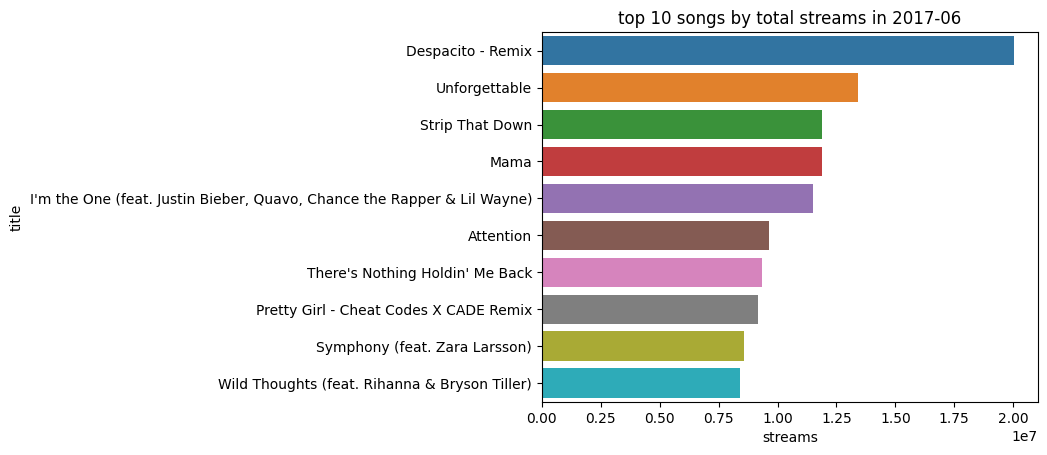

                                      artist     streams
129                               Ed Sheeran  40225344.0
93                                 DJ Khaled  22146168.0
256  Luis Fonsi, Daddy Yankee, Justin Bieber  20039367.0
152                 French Montana, Swae Lee  13403273.0
238                        Liam Payne, Quavo  11876370.0
205                Jonas Blue, William Singe  11875991.0
366                             Shawn Mendes  11407648.0
71                   Calvin Harris, Funk Wav  11215735.0
181                          Imagine Dragons  10808020.0
120                                    Drake  10800921.0


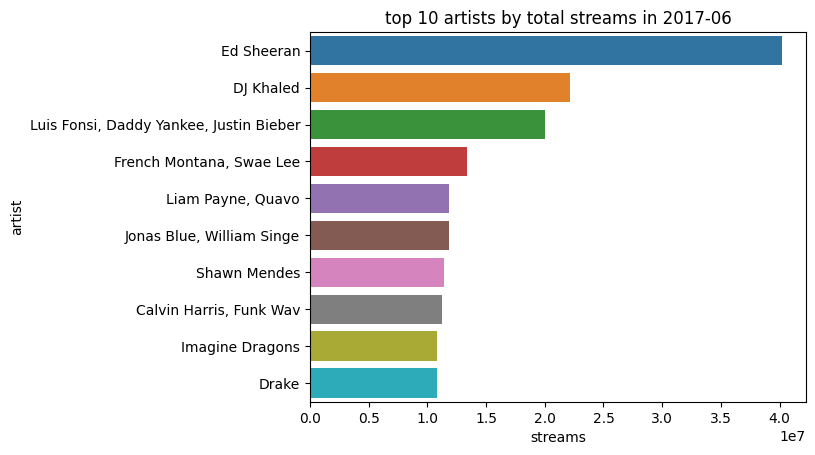

In [38]:
top_song_by_country_month('United Kingdom','2017-06')